**2. Cities in Sweden - real dataset**

 a) Read in the tab "Totalt" into a DataFrame and start exploring the data with some simple explorations such as:  
df.head()  
df.info()  
df.describe()  
Feel free to do more explorations.

In [3]:
path = "komtopp50_2020.xlsx"

df = pd.read_excel("komtopp50_2020.xlsx", sheet_name="Totalt")

df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Folkmängd per kommun 31 december 2020 jämfört ...,NaN,NaN,NaN,NaN,NaN
2,Sorterat i alfabetisk ordning. Rangordning frå...,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,Rang,NaN,Kommun,Folkmängd 31 december,NaN,Förändring


In [4]:
df.describe()
df.info()
df.shape
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  294 non-null    object 
 1   Unnamed: 1  291 non-null    float64
 2   Unnamed: 2  291 non-null    object 
 3   Unnamed: 3  292 non-null    object 
 4   Unnamed: 4  291 non-null    float64
 5   Unnamed: 5  292 non-null    object 
dtypes: float64(2), object(4)
memory usage: 14.0+ KB


Unnamed: 0    2
Unnamed: 1    5
Unnamed: 2    5
Unnamed: 3    4
Unnamed: 4    5
Unnamed: 5    4
dtype: int64

tar bort första raderna i datan. Gör rad 6-7 till header. 

In [5]:
import pandas as pd
import re

path = "komtopp50_2020.xlsx"

# Rad 6–7 är header (1-indexerat), alltså [5,6] i 0-index.
df = pd.read_excel(path, sheet_name="Totalt", header=[5, 6])
df.head()

Rang                  Kommun Folkmängd 31 december        Förändring
  2020 2019 Unnamed: 2_level_1                  2020   2019          %
0   83   84                Ale                 31868  31402   1.483982
1   64   64           Alingsås                 41602  41420   0.439401
2  123  123            Alvesta                 20224  20134   0.447005
3  255  255              Aneby                  6821   6848  -0.394276
4  169  167             Arboga                 14039  14087  -0.340740

 b) Clean your data so that the head looks like this (one row header, name and year (if exist))

In [6]:

import pandas as pd, re

df = pd.read_excel("komtopp50_2020.xlsx", sheet_name="Totalt", header=[5, 6])

first_word = lambda s: (re.findall(r"[A-Za-zÅÄÖåäö]+", str(s)) or [""])[0]   # första ordet i rad 1
year_only = lambda s: (re.findall(r"\b\d{4}\b", str(s)) or [""])[0]              # siffror i rad 2

# Bygg enradig header: "<första-ordet> <årtal>" (om årtal finns)
df.columns = [f"{first_word(a)} {year_only(b)}".strip() for a, b in df.columns]

df.head()


,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,83,84,Ale,31868,31402,1.483982
1,64,64,Alingsås,41602,41420,0.439401
2,123,123,Alvesta,20224,20134,0.447005
3,255,255,Aneby,6821,6848,-0.394276
4,169,167,Arboga,14039,14087,-0.340740


 c) Sort the cities by population from largest to smallest.

In [ ]:
def get_population_2020(df):
    return df[df["Folkmängd 2020"] == "Folkmängd 2020"]

get_population_2020(df)  

population_sorted = df.sort_values(by="Folkmängd 2020", ascending=False) # sorting descending by Population
population_sorted = population_sorted.reset_index(drop=True) # reset index after sorting
population_sorted    

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,1,1,Stockholm,975551,974073,0.151734
1,2,2,Göteborg,583056,579281,0.651670
2,3,3,Malmö,347949,344166,1.099179
3,4,4,Uppsala,233839,230767,1.331213
4,5,5,Linköping,164616,163051,0.959822
...,...,...,...,...,...,...
285,286,286,Åsele,2805,2794,0.393701
286,287,287,Arjeplog,2718,2785,-2.405745
287,288,288,Dorotea,2498,2551,-2.077617
288,289,289,Sorsele,2442,2489,-1.888309


d) Filter out the five smallest cities.

In [36]:
population_sorted = population_sorted.sort_values(by="Folkmängd 2020", ascending=True) # sorting descending by Calories column
city_5_smallest = population_sorted.iloc[:5] # Python-way slicing
city_5_smallest = city_5_smallest.reset_index(drop=True)
city_5_smallest

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,290,290,Bjurholm,2387,2408,-0.872093
1,289,289,Sorsele,2442,2489,-1.888309
2,288,288,Dorotea,2498,2551,-2.077617
3,287,287,Arjeplog,2718,2785,-2.405745
4,286,286,Åsele,2805,2794,0.393701


 e) Use the DataFrame to calculate Sweden's population in 2019 and 2020

In [12]:

total_population_2020 = df["Folkmängd 2020"].sum()
print(f"Folkmängd 2020: {total_population_2020}")  

total_population_2019 = df["Folkmängd 2019"].sum()
print(f"Folkmängd 2019: {total_population_2019}")   

Folkmängd 2020: 10379295
Folkmängd 2019: 10327589


f) Plot a bar chart for the five largest cities and the five smallest cities.

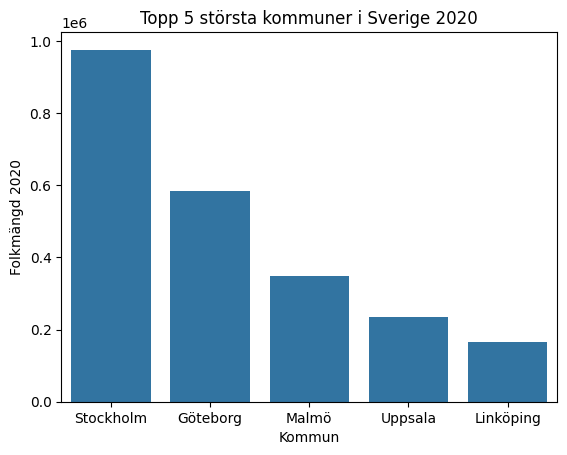

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

population_sorted = population_sorted.sort_values(by="Folkmängd 2020", ascending=False) # sorting descending by Calories column
city_5_largest = population_sorted.iloc[:5] # Python-way slicing
city_5_largest = city_5_largest.reset_index(drop=True)
city_5_largest



ax = sns.barplot(data=city_5_largest, x="Kommun", y="Folkmängd 2020")  # who = antal personer, hue = överlevde eller inte  
ax.set(ylabel="Folkmängd 2020", title="Topp 5 största kommuner i Sverige 2020")
plt.show()  
 # who = antal personer, hue = överlevde eller inte  


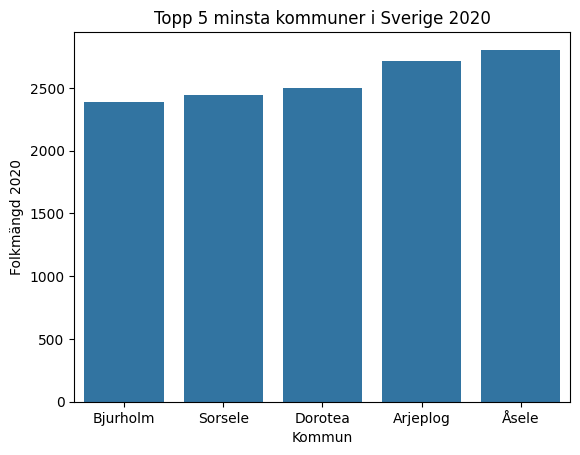

In [37]:
ax = sns.barplot(data=city_5_smallest, x="Kommun", y="Folkmängd 2020")
ax.set(ylabel="Folkmängd 2020", title="Topp 5 minsta kommuner i Sverige 2020")
plt.show()  

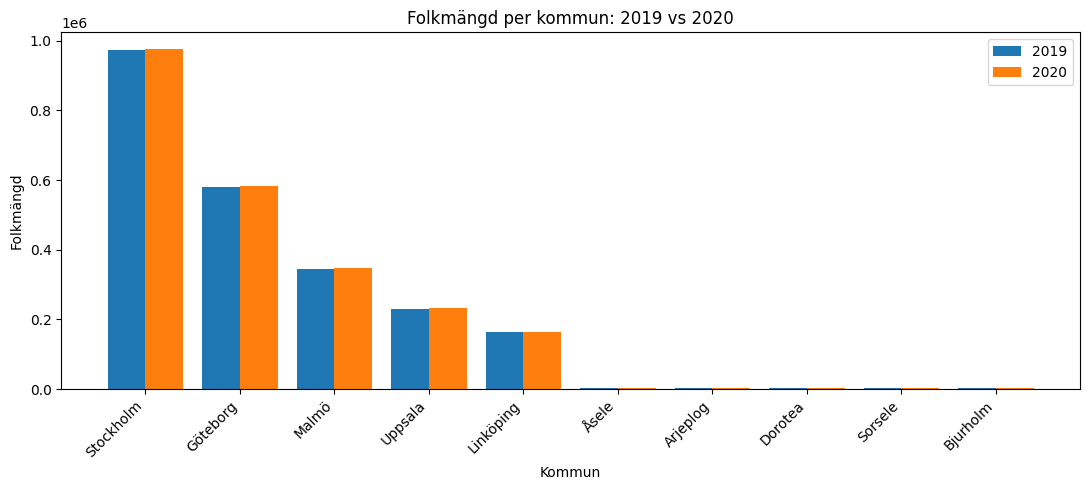

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) Slå ihop data
both = pd.concat([city_5_largest, city_5_smallest], ignore_index=True).copy()
both["Folkmängd 2019"] = pd.to_numeric(both["Folkmängd 2019"], errors="coerce")
both["Folkmängd 2020"] = pd.to_numeric(both["Folkmängd 2020"], errors="coerce")

# 2) Ordning: först topp 5 (störst→mindre), sen botten 5 (störst→mindre)
order = list(city_5_largest.sort_values("Folkmängd 2020", ascending=False)["Kommun"]) + \
        list(city_5_smallest.sort_values("Folkmängd 2020", ascending=False)["Kommun"])
order = list(dict.fromkeys(order))
both = both.set_index("Kommun").loc[order].reset_index()

# 3) Plot
x = np.arange(len(order))
w = 0.4

fig, ax = plt.subplots(figsize=(11, 5))
ax.bar(x - w/2, both["Folkmängd 2019"], width=w, label="2019")
ax.bar(x + w/2, both["Folkmängd 2020"], width=w, label="2020")

ax.set_xticks(x)
ax.set_xticklabels(order, rotation=45, ha="right")
ax.set_ylabel("Folkmängd")
ax.set_xlabel("Kommun")
ax.set_title("Folkmängd per kommun: 2019 vs 2020")
ax.legend()
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns   

population_total_ = df.groupby(["Folkmängd 2019", "Folkmängd 2020"]).count()
population_total_ = population_total_.reset_index()
ax = sns.barplot(data=population_total_, x="Folkmängd 2019", y="Folkmängd 2020")  # who = antal personer, hue = överlevde eller inte  
ax.set(ylabel="count", title="Befolkning 2019 vs 2020")

,,Rang 2020,Rang 2019,Kommun,Förändring
Folkmängd 2019,Folkmängd 2020,,,,
2408,2387,290,290,Bjurholm,-0.872093
2489,2442,289,289,Sorsele,-1.888309
2551,2498,288,288,Dorotea,-2.077617
2785,2718,287,287,Arjeplog,-2.405745
2794,2805,286,286,Åsele,0.393701
...,...,...,...,...,...
163051,164616,5,5,Linköping,0.959822
230767,233839,4,4,Uppsala,1.331213
344166,347949,3,3,Malmö,1.099179
